In [1]:
from abc import ABC, abstractmethod
import itertools as itt
import os
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Prerequisites: mean JIs for n = N_from...N_to and m = M_from...M_to from comaprisons with network from entire data must have 
# been computed
alg_sels = ['WGCNA', 'CEMI'] # enter string identifiers of methods
ct_sels = ['KIRC', 'LUSC', 'KIRP'] # enter string identifiers of cohorts
conf_sels = ['gender.demographic'] # enter string identifiers of confounders
blocks = ['female', 'male']
fro = 0 # choose max(N_from, M_from)
to = 20 # choose min(N_to, M_to)
cwd = os.getcwd()

In [14]:
JI = pd.DataFrame(columns = ['Confounder/\nvariable', 'Cohort', 'Method', 'Block type', 'partID', 'k', 'mean JI'])
for alg_sel in alg_sels:
    for conf_sel in conf_sels:
        for ct_sel in ct_sels:
            for block in blocks:
                path = os.path.join(cwd, 'results', 'JI')
                for i in range(fro, to):
                    filename = f'g_all_conf_{i}_{str(alg_sel)}_{str(conf_sel)}_{str(ct_sel)}_{block}_jaccInd.csv'
                    try:
                        df_conf = pd.read_csv(os.path.join(path, filename), sep=',', header=0)
                        df_conf['partID'] = i
                        df_conf['Block type'] = f'confounder-based\n{block} block'
                        df_conf['Method'] = alg_sel
                        df_conf['Cohort'] = ct_sel
                        df_conf['Confounder/\nvariable'] = conf_sel
                    except:
                        continue
                    filename = f'g_all_rnd_{i}_{str(alg_sel)}_{str(conf_sel)}_{str(ct_sel)}_{block}_jaccInd.csv'
                    try:
                        df_rnd = pd.read_csv(os.path.join(path, filename), sep=',', header=0)
                        df_rnd['partID'] = i
                        df_rnd['Block type'] = f'random\n{block} block'
                        df_rnd['Method'] = alg_sel
                        df_rnd['Cohort'] = ct_sel
                        df_rnd['Confounder/\nvariable'] = conf_sel
                    except:
                        continue
                    JI = pd.concat([JI, df_conf, df_rnd])
JI.rename(columns={'mean JI': 'Mean JI'}, inplace=True)
JI = JI[JI['k']%100 == 10]
JI['Cohort -\nConfounder'] = JI['Cohort'] + ' - ' + JI['Confounder/\nvariable']
print(JI.head())

  Confounder/\nvariable Cohort Method                      Block type partID  \
0                   sex   KIRC  WGCNA  confounder-based\nfemale block      0   
1                   sex   KIRC  WGCNA  confounder-based\nfemale block      0   
2                   sex   KIRC  WGCNA  confounder-based\nfemale block      0   
3                   sex   KIRC  WGCNA  confounder-based\nfemale block      0   
4                   sex   KIRC  WGCNA  confounder-based\nfemale block      0   

     k   Mean JI  size intersection  size union      state  
0   10  0.250000                4.0        16.0  filled01_  
1   60  0.411765               35.0        85.0  filled01_  
2  110  0.349693               57.0       163.0  filled01_  
3  160  0.344538               82.0       238.0  filled01_  
4  210  0.372549              114.0       306.0  filled01_  


In [15]:
# add custom modifications to fields, if necessary
JI['Confounder/\nvariable'] = JI['Confounder/\nvariable'].replace(['race'], 'ethnicity')
JI = JI.replace('ARACNE', 'ARACNe-AP').replace('CEMI', 'CEMiTool').replace('GRNBOOST2', 'GRNBoost2')

  Confounder/\nvariable Cohort Method                      Block type  partID  \
0                   sex   KIRC  WGCNA  confounder-based\nfemale block       0   
2                   sex   KIRC  WGCNA  confounder-based\nfemale block       0   
4                   sex   KIRC  WGCNA  confounder-based\nfemale block       0   
6                   sex   KIRC  WGCNA  confounder-based\nfemale block       0   
8                   sex   KIRC  WGCNA  confounder-based\nfemale block       0   

     k   Mean JI  size intersection  size union      state  \
0   10  0.250000                4.0        16.0  filled01_   
2  110  0.349693               57.0       163.0  filled01_   
4  210  0.372549              114.0       306.0  filled01_   
6  310  0.418764              183.0       437.0  filled01_   
8  410  0.474820              264.0       556.0  filled01_   

  Cohort -\nConfounder  
0           KIRC - sex  
2           KIRC - sex  
4           KIRC - sex  
6           KIRC - sex  
8           KIR

<Figure size 432x288 with 0 Axes>

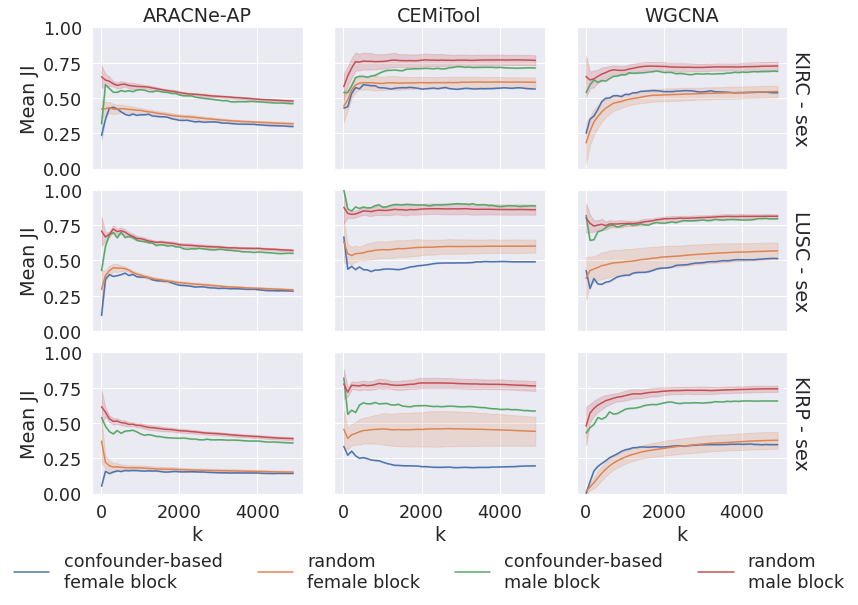

In [19]:
#plt.figure()
plt.tight_layout()
sns.set(font_scale=1.6)
#sns.set()
sns.set_style('darkgrid')
g = sns.FacetGrid(JI, row='Cohort -\nConfounder', col='Method', hue='Block type', margin_titles=True, 
                  ylim=(0,1), legend_out=False, aspect=1.3)
ax = g.axes[0,0]
g.map(sns.lineplot, "k", "Mean JI",errorbar='sd').add_legend()
sns.move_legend(ax, "lower center", frameon=False, bbox_to_anchor=(1.6,-3.1), title=None, ncols=4)
g.set_titles(row_template='{row_name}', col_template = '{col_name}')
plt.subplots_adjust(hspace=0.15, wspace=0.15)
g.savefig('G_all.pdf', bbox_inches='tight')